# **Phân tích và trực quan hóa dữ liệu**

## **Import thư viện cần thiết**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%matplotlib inline

## **Dữ liệu**

In [ ]:
df = pd.read_csv("../data/data_processed/data_processed.csv")
df.head()

LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  ...   Min    Max  \
0  120.0  0.0  0.0  0.0  0.0  0.0  0.0  73.0   0.5  43.0  ...  62.0  126.0   
1  132.0  4.0  0.0  4.0  2.0  0.0  0.0  17.0   2.1   0.0  ...  68.0  198.0   
2  133.0  2.0  0.0  5.0  2.0  0.0  0.0  16.0   2.1   0.0  ...  68.0  198.0   
3  134.0  2.0  0.0  6.0  2.0  0.0  0.0  16.0   2.4   0.0  ...  53.0  170.0   
4  132.0  4.0  0.0  5.0  0.0  0.0  0.0  16.0   2.4   0.0  ...  53.0  170.0   

   Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  NSP  
0   2.0     0.0  120.0  137.0   121.0      73.0       1.0  2.0  
1   6.0     1.0  141.0  136.0   140.0      12.0       0.0  1.0  
2   5.0     1.0  141.0  135.0   138.0      13.0       0.0  1.0  
3  11.0     0.0  137.0  134.0   137.0      13.0       1.0  1.0  
4   9.0     0.0  137.0  136.0   138.0      11.0       1.0  1.0  

[5 rows x 22 columns]

## **Phân tích các tham số thống kê của dữ liệu gốc**

In [8]:
print("Thống kê mô tả dữ liệu số:")
print(df.describe().T)

Thống kê mô tả dữ liệu số:
           count        mean        std    min    25%    50%    75%    max
LB        2126.0  133.303857   9.840844  106.0  126.0  133.0  140.0  160.0
AC        2126.0    2.722484   3.560850    0.0    0.0    1.0    4.0   26.0
FM        2126.0    7.241298  37.125309    0.0    0.0    0.0    2.0  564.0
UC        2126.0    3.659925   2.847094    0.0    1.0    3.0    5.0   23.0
DL        2126.0    1.570085   2.499229    0.0    0.0    0.0    3.0   16.0
DS        2126.0    0.003293   0.057300    0.0    0.0    0.0    0.0    1.0
DP        2126.0    0.126058   0.464361    0.0    0.0    0.0    0.0    4.0
ASTV      2126.0   46.990122  17.192814   12.0   32.0   49.0   61.0   87.0
MSTV      2126.0    1.332785   0.883241    0.2    0.7    1.2    1.7    7.0
ALTV      2126.0    9.846660  18.396880    0.0    0.0    0.0   11.0   91.0
MLTV      2126.0    8.187629   5.628247    0.0    4.6    7.4   10.8   50.7
Width     2126.0   70.445908  38.955693    3.0   37.0   67.5  100.0  180.

##  **Ma trận tương quan**

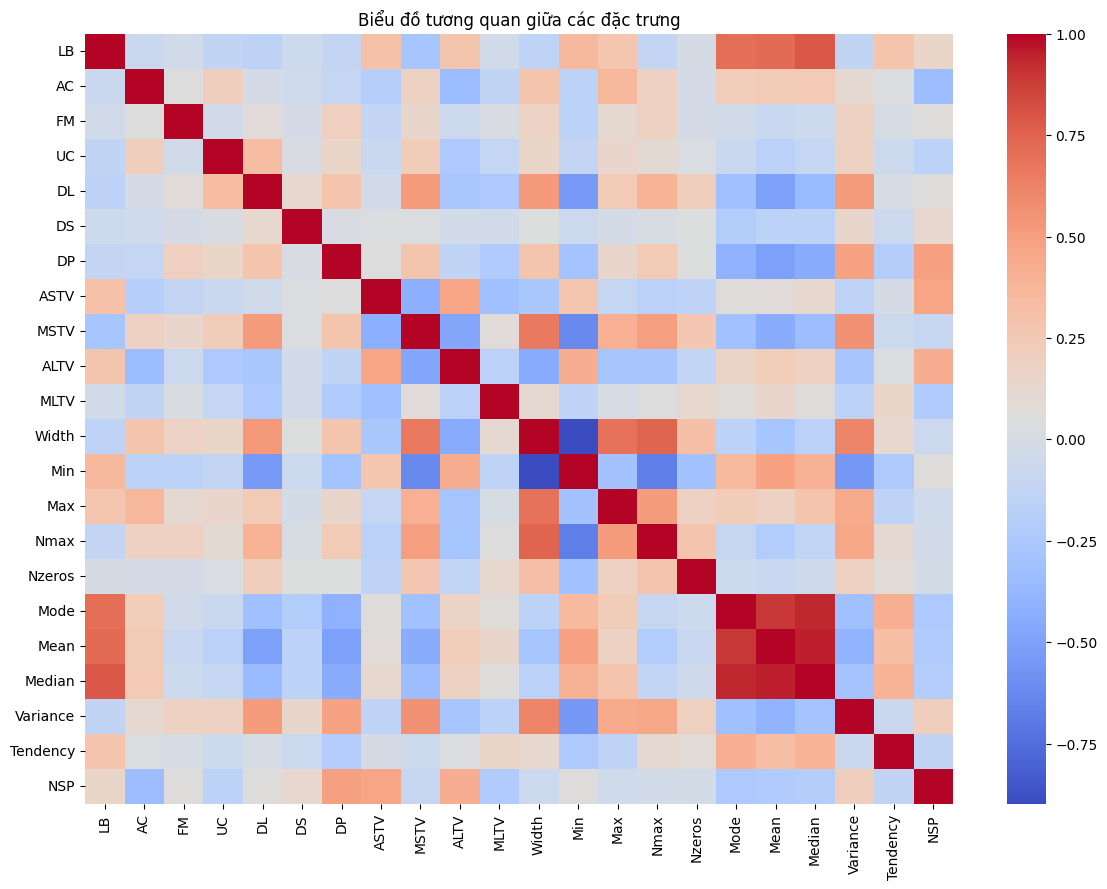

In [9]:
# Ma trận tương quan
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Biểu đồ tương quan giữa các đặc trưng")
plt.show()

Có một nhóm các đặc trưng liên quan đến nhịp tim cơ bản và các thước đo xu hướng trung tâm của nhịp tim thai có mối tương quan rất chặt chẽ.

Các đặc trưng về độ biến thiên ngắn hạn (ASTV, MSTV) có mối quan hệ nghịch đảo rõ rệt.

Mối quan hệ giữa các đặc trưng nhịp tim thai và các sự kiện giảm tốc (DL, DS, DP) có sự khác biệt, cho thấy chúng có thể mang thông tin độc lập.





## **Histogram của các đặc trưng**

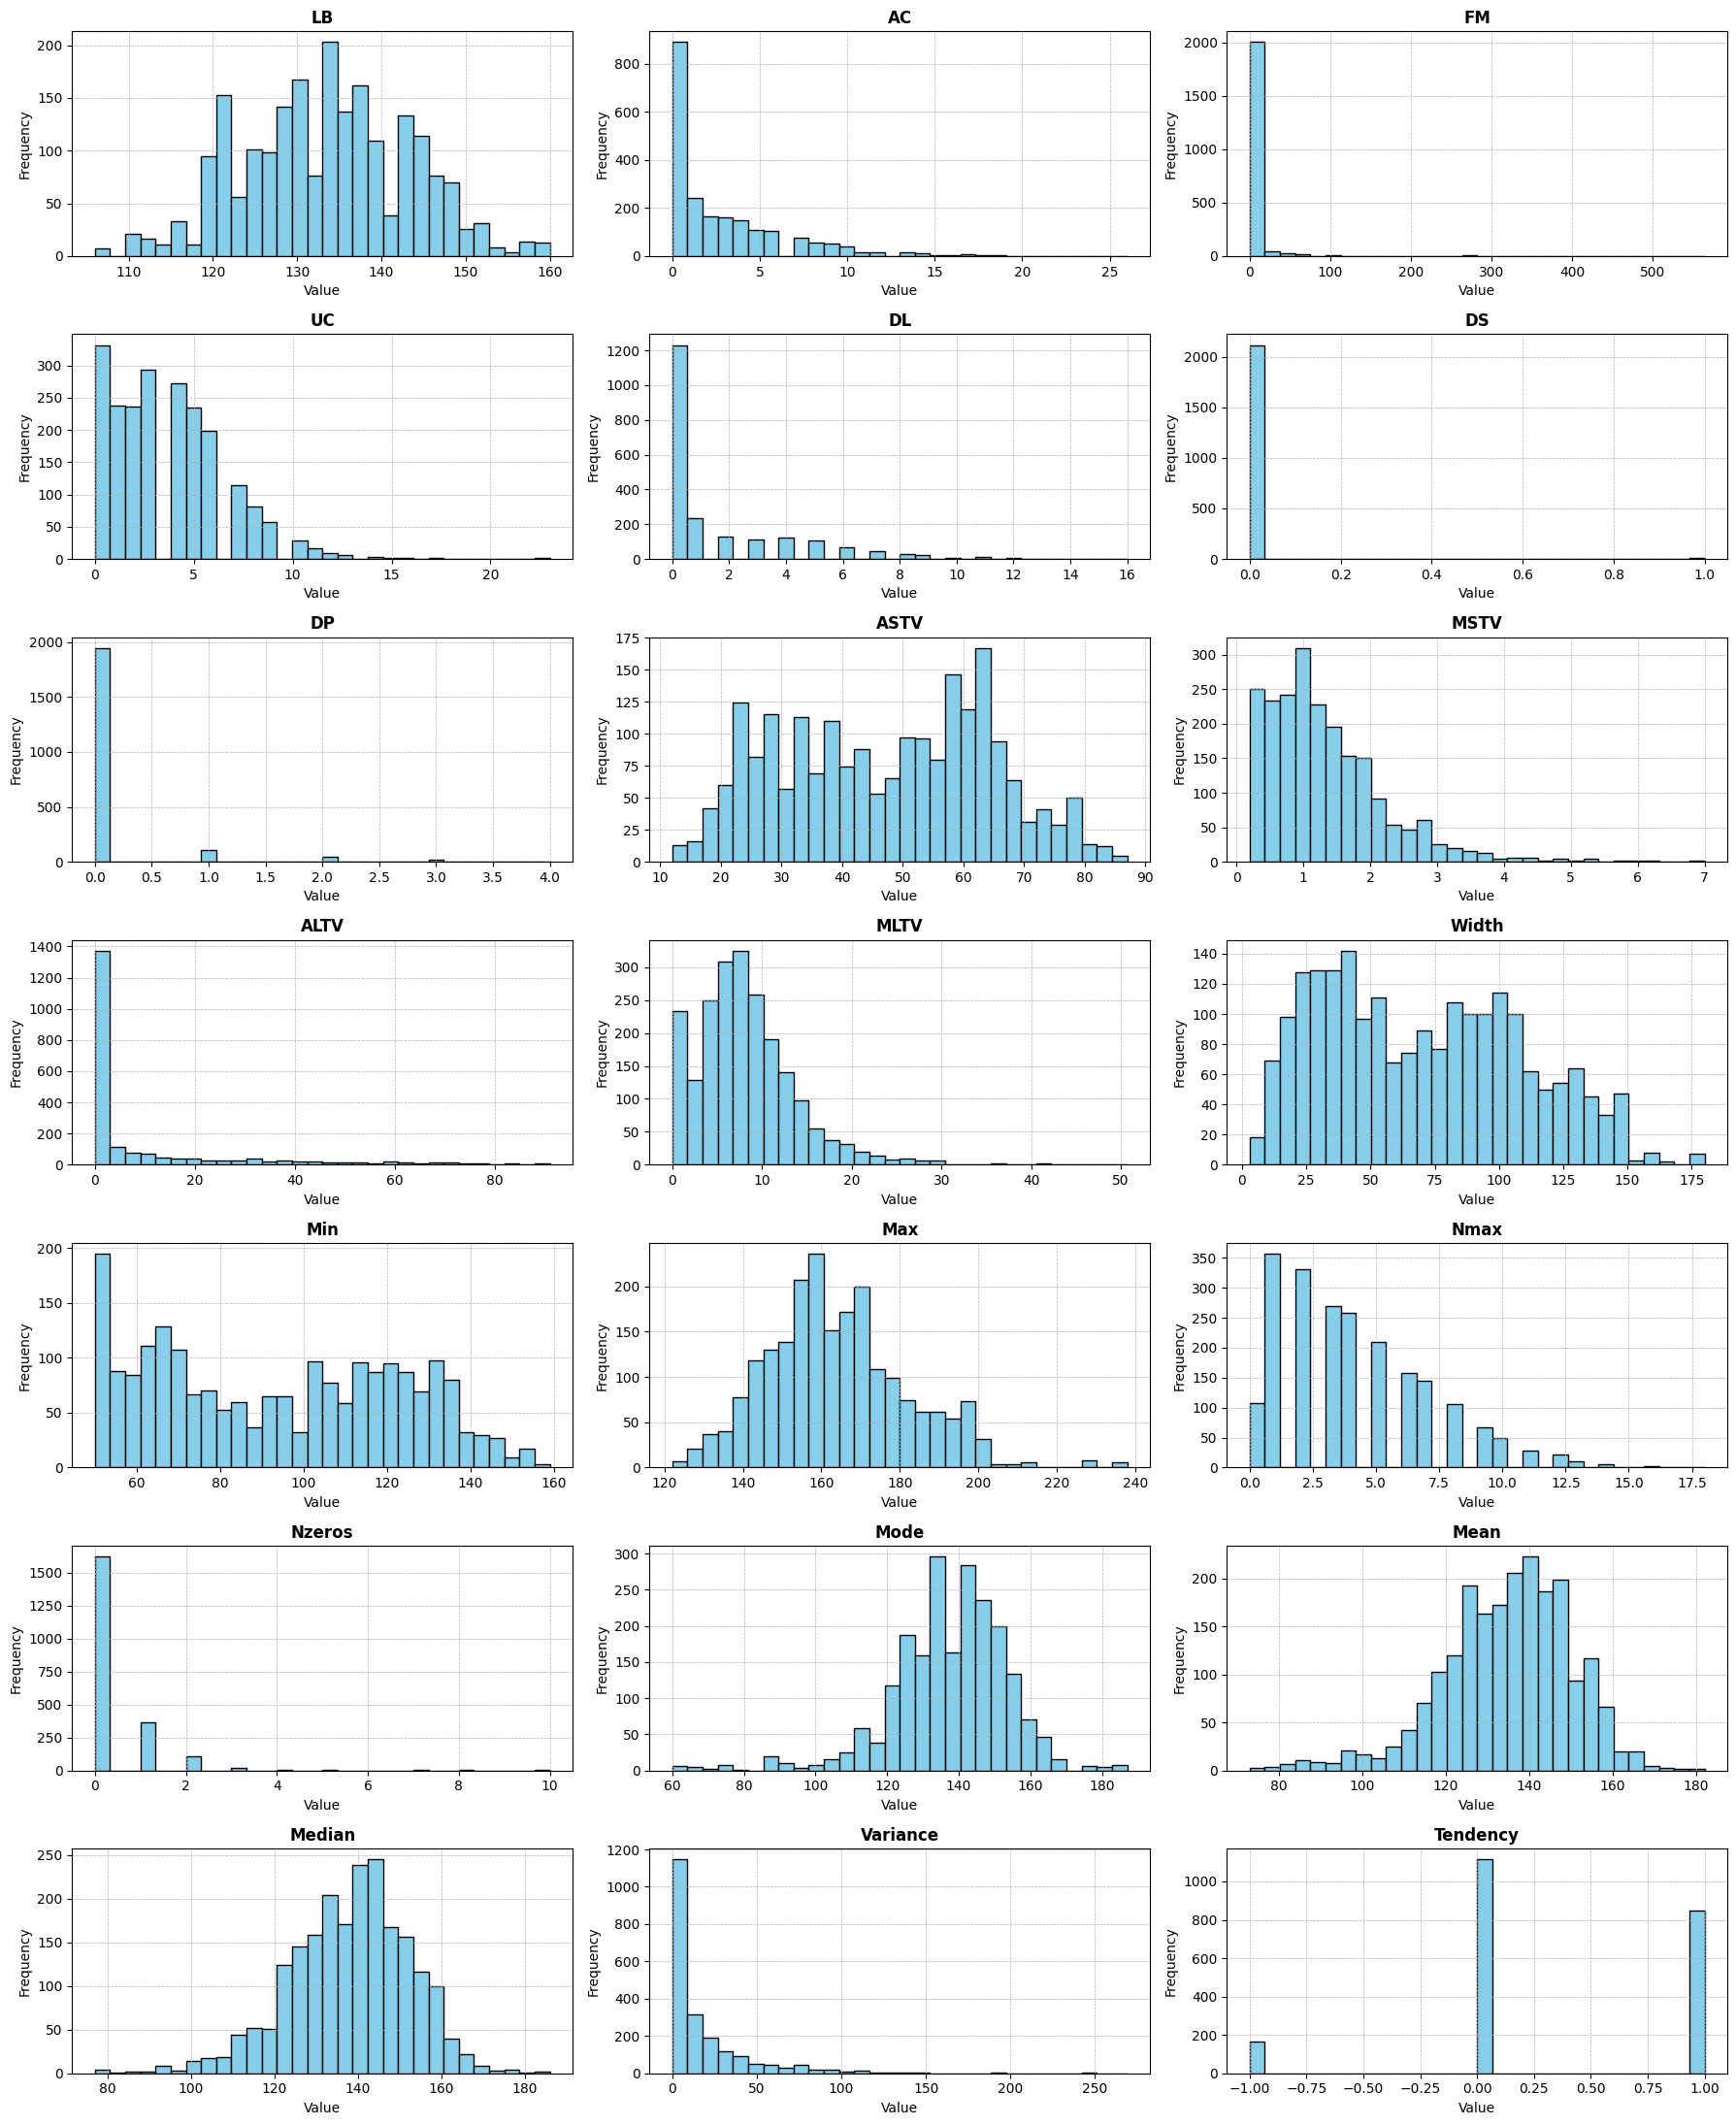

In [51]:
import matplotlib.pyplot as plt

features = df.drop("NSP", axis=1).columns

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(18, 22))
axes = axes.ravel() 

for i, col in enumerate(features):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')  # Thêm màu sắc cho histogram
    axes[i].set_title(col, fontsize=12, fontweight='bold')  # Thêm định dạng tiêu đề
    axes[i].set_xlabel('Value', fontsize=10)  # Thêm nhãn cho trục x
    axes[i].set_ylabel('Frequency', fontsize=10)  # Thêm nhãn cho trục y
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)  # Thêm lưới cho các histogram

plt.tight_layout()
plt.show()


## **Phân bổ nhãn**

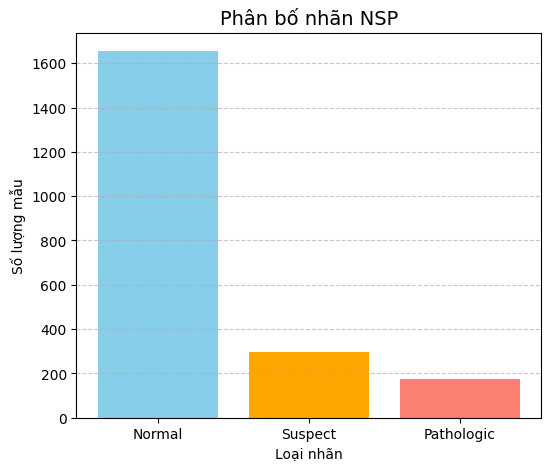

In [52]:
import matplotlib.pyplot as plt

# Đếm số lượng mỗi nhãn
label_counts = df['NSP'].value_counts().sort_index()

# Tên lớp
label_names = {1: 'Normal', 2: 'Suspect', 3: 'Pathologic'}

# Vẽ biểu đồ
plt.figure(figsize=(6, 5))
plt.bar(label_counts.index.map(label_names), label_counts.values, color=['skyblue', 'orange', 'salmon'])
plt.title('Phân bố nhãn NSP', fontsize=14)
plt.xlabel('Loại nhãn')
plt.ylabel('Số lượng mẫu')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Chuẩn hóa dữ liệu**

In [ ]:
# Tách đặc trưng và nhãn
X = df.drop("NSP", axis=1)
y = df["NSP"]

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Tham số thống kê của dữ liệu sau khi đã chuẩn hóa
# Tạo DataFrame từ dữ liệu chuẩn hóa
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe()

LB            AC            FM            UC            DL  \
count  2.126000e+03  2.126000e+03  2.126000e+03  2.126000e+03  2.126000e+03   
mean   1.069490e-15 -1.336863e-17 -2.673726e-17 -8.021179e-17 -1.069490e-16   
std    1.000235e+00  1.000235e+00  1.000235e+00  1.000235e+00  1.000235e+00   
min   -2.775197e+00 -7.647398e-01 -1.950961e-01 -1.285798e+00 -6.283755e-01   
25%   -7.423728e-01 -7.647398e-01 -1.950961e-01 -9.344795e-01 -6.283755e-01   
50%   -3.088439e-02 -4.838420e-01 -1.950961e-01 -2.318435e-01 -6.283755e-01   
75%    6.806040e-01  3.588517e-01 -1.412118e-01  4.707926e-01  5.722772e-01   
max    2.713428e+00  6.538605e+00  1.500027e+01  6.794517e+00  5.775106e+00   

                 DS            DP          ASTV          MSTV          ALTV  \
count  2.126000e+03  2.126000e+03  2.126000e+03  2.126000e+03  2.126000e+03   
mean   6.684315e-18  1.336863e-17 -7.352747e-17  6.684315e-17 -5.347452e-17   
std    1.000235e+00  1.000235e+00  1.000235e+00  1.000235e+00  1.000235e+00   
min   -5.747560e-02 -2.715300e-01 -2.035639e+00 -1.282833e+00 -5.353613e-01   
25%   -5.747560e-02 -2.715300e-01 -8.720881e-01 -7.166031e-01 -5.353613e-01   
50%   -5.747560e-02 -2.715300e-01  1.169297e-01 -1.503732e-01 -5.353613e-01   
75%   -5.747560e-02 -2.715300e-01  8.150599e-01  4.158567e-01  6.270688e-02   
max    1.739869e+01  8.344482e+00  2.327675e+00  6.417893e+00  4.412293e+00   

       ...         Width           Min           Max          Nmax  \
count  ...  2.126000e+03  2.126000e+03  2.126000e+03  2.126000e+03   
mean   ... -3.007942e-17 -4.679021e-17 -1.203177e-16 -1.671079e-16   
std    ...  1.000235e+00  1.000235e+00  1.000235e+00  1.000235e+00   
min    ... -1.731757e+00 -1.474609e+00 -2.342558e+00 -1.379664e+00   
25%    ... -8.587648e-01 -8.993760e-01 -6.703135e-01 -7.013968e-01   
50%    ... -7.563980e-02 -1.960840e-02 -1.128988e-01 -3.622634e-01   
75%    ...  7.588376e-01  8.939964e-01  5.559989e-01  6.551369e-01   
max    ...  2.812936e+00  2.213648e+00  4.123453e+00  4.724738e+00   

             Nzeros          Mode          Mean        Median      Variance  \
count  2.126000e+03  2.126000e+03  2.126000e+03  2.126000e+03  2.126000e+03   
mean   2.757280e-17  1.069490e-16 -6.684315e-16  2.673726e-16 -5.347452e-17   
std    1.000235e+00  1.000235e+00  1.000235e+00  1.000235e+00  1.000235e+00   
min   -4.584438e-01 -4.729191e+00 -3.951945e+00 -4.223849e+00 -6.492081e-01   
25%   -4.584438e-01 -5.160773e-01 -6.164580e-01 -6.285137e-01 -5.801731e-01   
50%   -4.584438e-01  9.451891e-02  8.912573e-02  6.289690e-02 -4.075856e-01   
75%   -4.584438e-01  6.440555e-01  6.664215e-01  6.851664e-01  1.792117e-01   
max    1.370800e+01  3.025381e+00  3.039749e+00  3.312527e+00  8.635997e+00   

           Tendency  
count  2.126000e+03  
mean  -1.069490e-16  
std    1.000235e+00  
min   -2.162031e+00  
25%   -5.245255e-01  
50%   -5.245255e-01  
75%    1.112980e+00  
max    1.112980e+00  

[8 rows x 21 columns]

## **PCA - Principal Component Analysis**

In [11]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

### **Tham số thống kê của dữ liệu sau khi phân tích thành phần chính**

In [13]:
# Tham số thống kê của dữ liệu sau khi đã PCA
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(6)])
pca_df.describe()

PC1           PC2          PC3           PC4           PC5  \
count  2126.000000  2.126000e+03  2126.000000  2.126000e+03  2.126000e+03   
mean      0.000000 -2.673726e-17     0.000000 -2.673726e-17 -2.673726e-17   
std       2.455425  1.866772e+00     1.353368  1.220196e+00  1.077526e+00   
min      -9.800565 -6.123347e+00    -5.162649 -6.098757e+00 -5.110214e+00   
25%      -1.415224 -1.328559e+00    -0.917308 -8.287262e-01 -5.016198e-01   
50%       0.167998  2.185883e-02    -0.067790  3.634963e-02  4.071533e-02   
75%       1.802201  1.319799e+00     0.942642  7.800481e-01  4.356572e-01   
max       5.246632  6.558881e+00     4.129781  5.029948e+00  9.306184e+00   

                PC6  
count  2.126000e+03  
mean  -6.015884e-17  
std    1.019109e+00  
min   -4.604871e+00  
25%   -5.467913e-01  
50%   -6.257743e-03  
75%    4.822346e-01  
max    1.082192e+01

### **Hiển thị trực quan đối với dữ liệu theo từng cặp 02 thành phần chính**

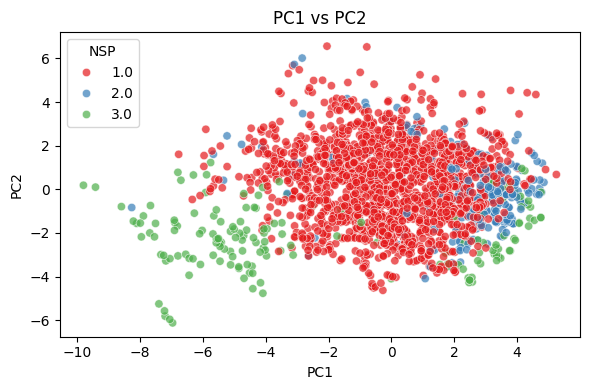

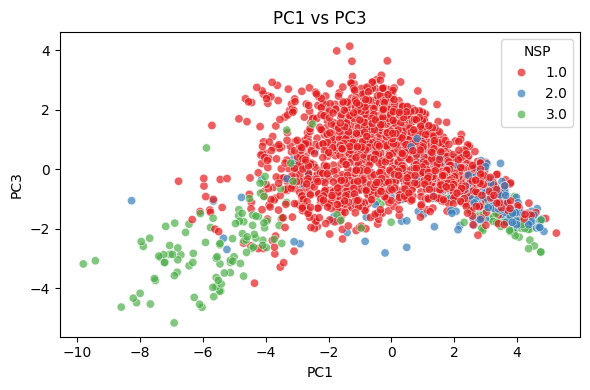

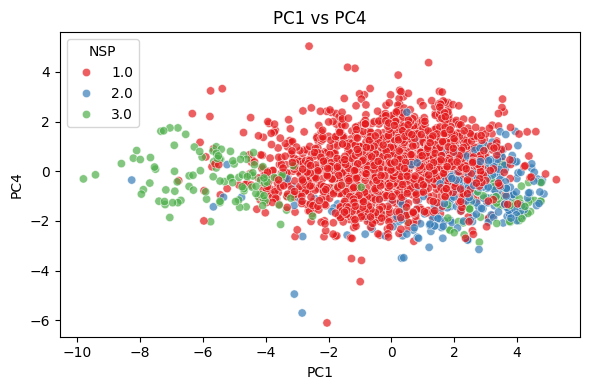

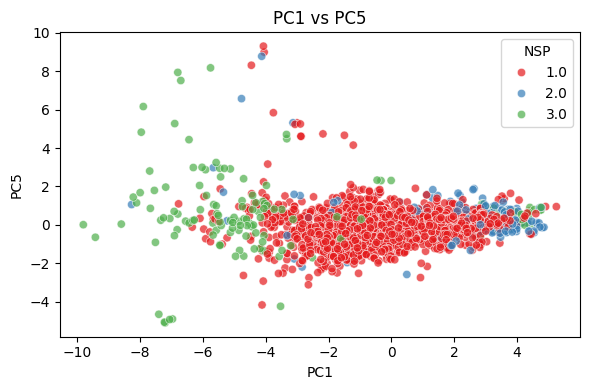

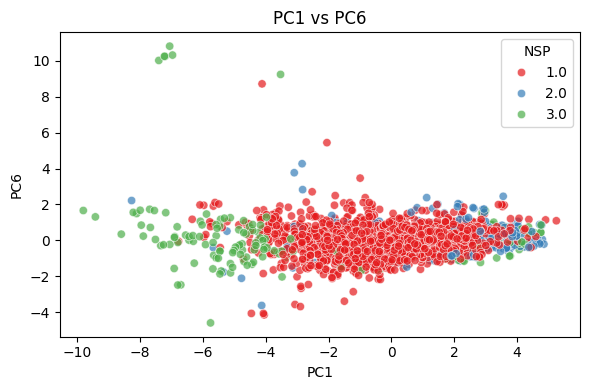

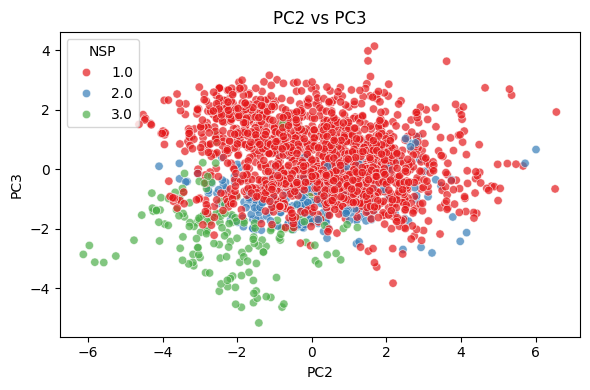

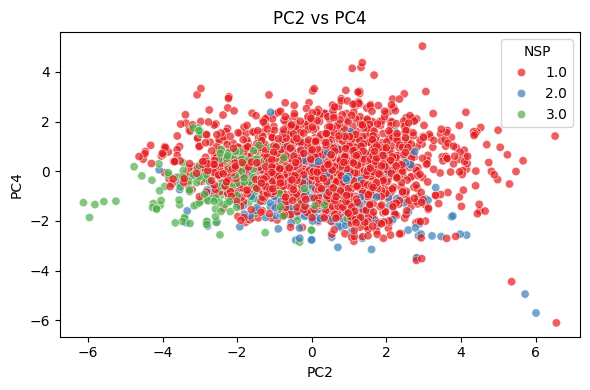

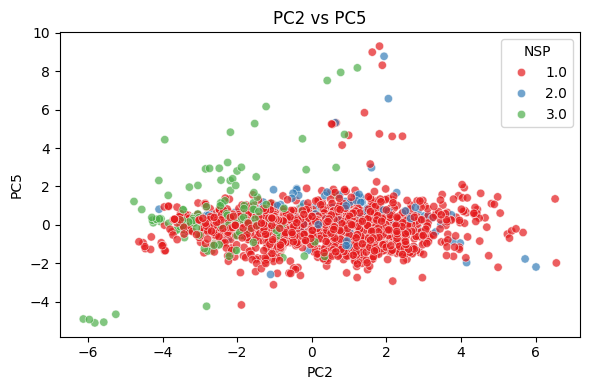

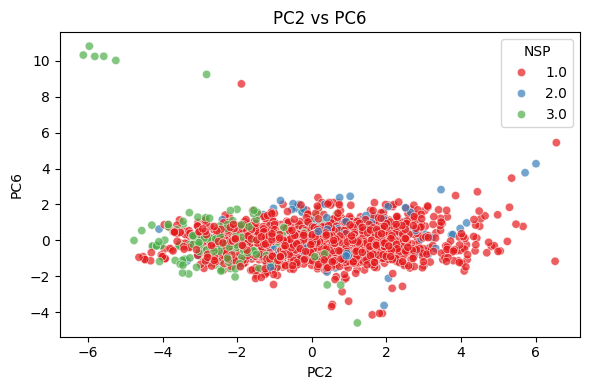

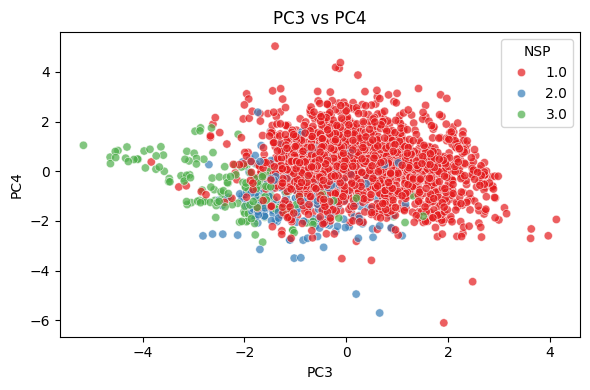

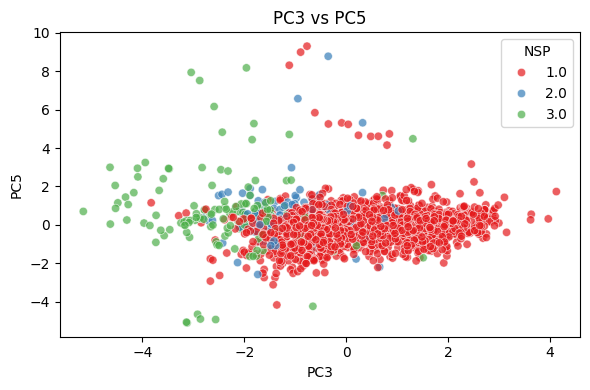

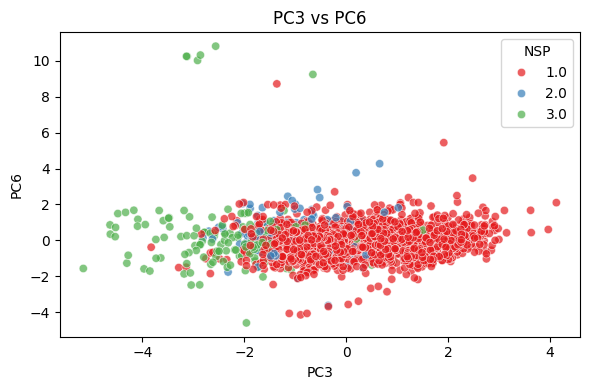

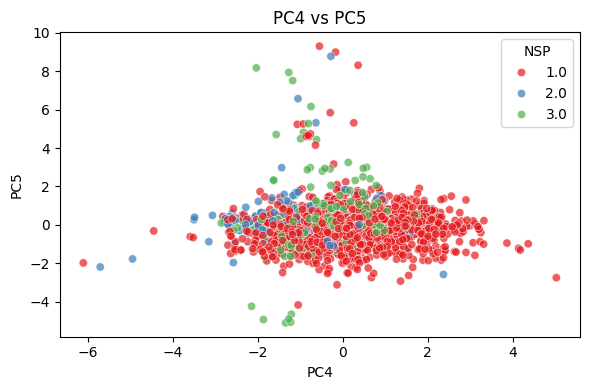

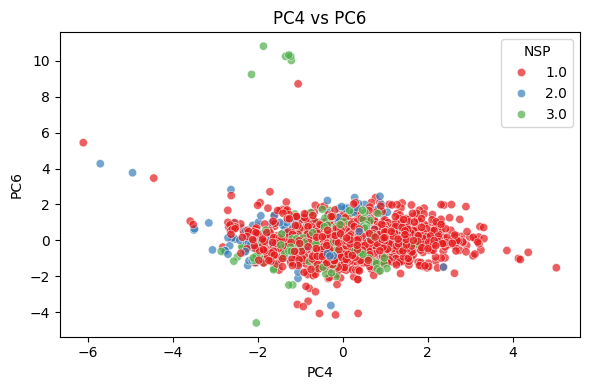

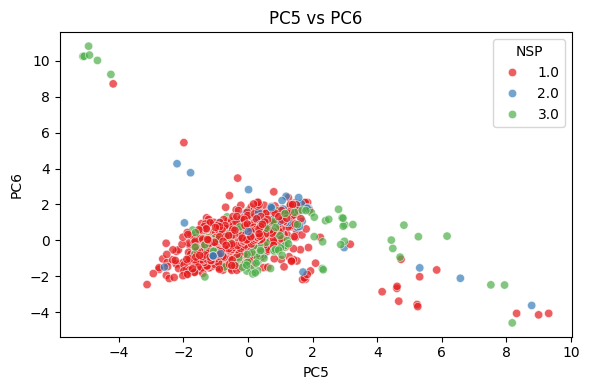

In [15]:
# Thêm nhãn vào DataFrame 
pca_df['NSP'] = y

# Tạo tất cả các cặp tổ hợp 2 thành phần chính (PCs)
pairs = list(itertools.combinations([f"PC{i+1}" for i in range(6)], 2))

# Vẽ biểu đồ phân tán cho từng cặp
for pc1, pc2 in pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=pca_df, x=pc1, y=pc2, hue='NSP', palette='Set1', alpha=0.7)
    plt.title(f'{pc1} vs {pc2}')
    plt.tight_layout()
    plt.show()

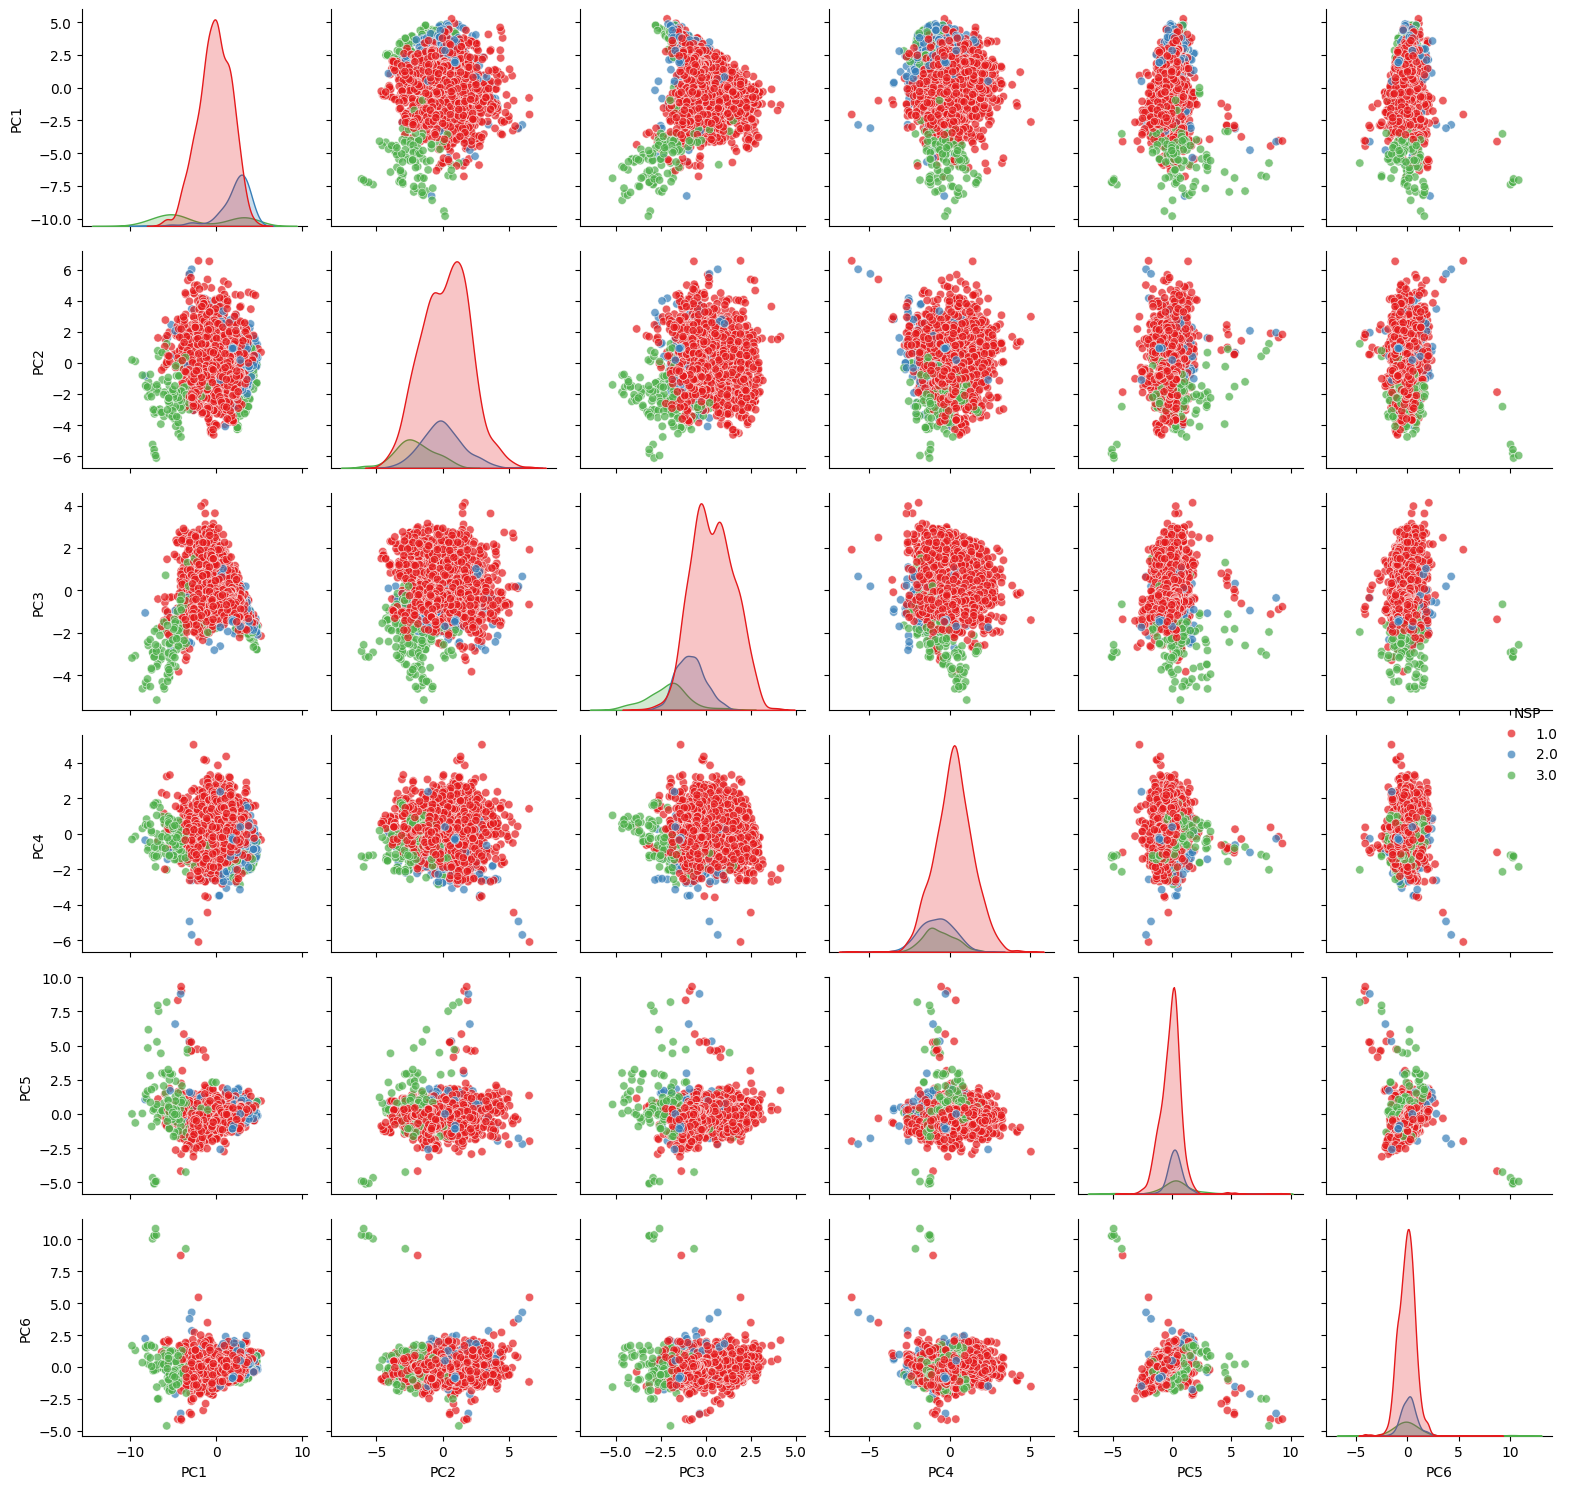

In [16]:
# Vẽ pairplot cho các thành phần chính (PCA)
sns.pairplot(pca_df, hue='NSP', palette='Set1', plot_kws={'alpha': 0.7})

plt.tight_layout()
plt.show()

### **Xác định lượng thông tin được bảo tồn theo phương sai giải thích (explained variances)**

In [34]:
# Phương sai giải thích của mỗi thành phần chính
explained_variance_pca = pca.explained_variance_ratio_
print(f"Phương sai giải thích của mỗi thành phần chính: {explained_variance_pca}")

Phương sai giải thích của mỗi thành phần chính: [0.28696544 0.16586654 0.08717829 0.07086558 0.05526271 0.04943312]


In [38]:
# Phương sai giải thích tích lũy
cumulative_explained_variance_pca = np.cumsum(explained_variance_pca)
print(f"Phương sai giải thích tích lũy của PCA: {cumulative_explained_variance_pca}")

Phương sai giải thích tích lũy của PCA: [0.28696544 0.45283198 0.54001027 0.61087584 0.66613856 0.71557168]


Cần tới 6 thành phần chính mới giữ lại khoảng 71.6% thông tin từ dữ liệu ban đầu.

Các thành phần chính sau thành phần đầu tiên mang ít thông tin hơn đáng kể => thể hiện đặc trưng phân tán.

PCA không quan tâm đến nhãn (label), chỉ giữ lại các chiều dữ liệu có phương sai lớn nhất => tốt cho mục tiêu khai phá, nén dữ liệu nhưng không đảm bảo phân biệt được nhãn.



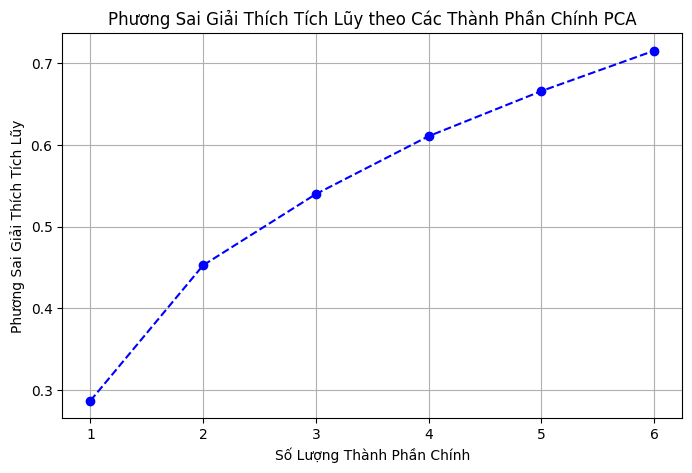

In [36]:
# Trực quan hóa phương sai giải thích của từng thành phần chính
plt.figure(figsize=(8, 5))
plt.plot(range(1, 7), cumulative_explained_variance_pca, marker='o', linestyle='--', color='b')
plt.title("Phương Sai Giải Thích Tích Lũy theo Các Thành Phần Chính PCA")
plt.xlabel("Số Lượng Thành Phần Chính")
plt.ylabel("Phương Sai Giải Thích Tích Lũy")
plt.grid(True)
plt.show()

### **Thực hiện trực quan hóa mối quan hệ của một số chiều dữ liệu chính với đầu ra để xem xét khả năng có tương quan hay hình thành cụm dữ liệu**

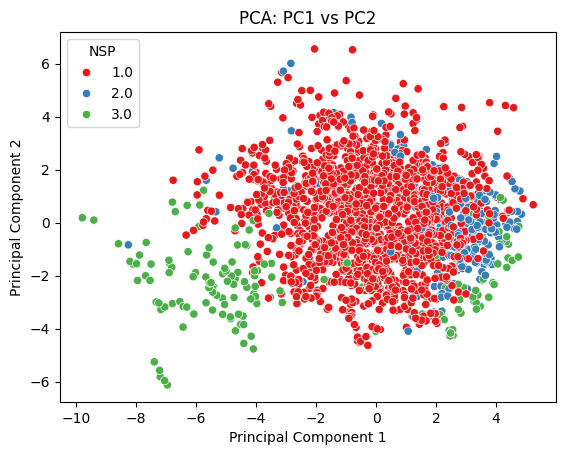

In [26]:
# Trực quan hóa mối quan hệ giữa các cặp thành phần chính với nhãn đầu ra (NSP)
# Cặp: PCA1 và PCA2
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['NSP'], palette='Set1')
plt.title("PCA: PC1 vs PC2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="NSP")
plt.show()


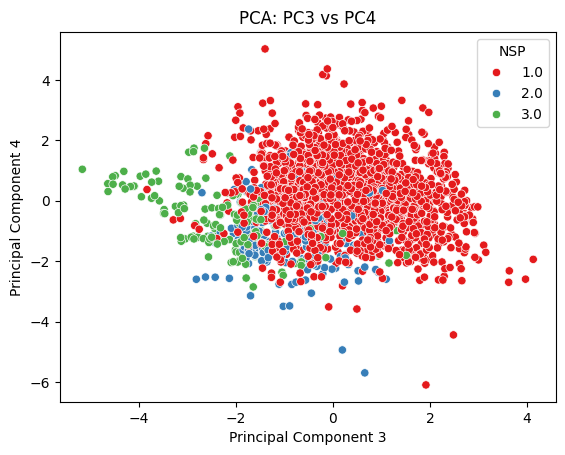

In [27]:
# Cặp: PC3 và PC4
sns.scatterplot(x=pca_df['PC3'], y=pca_df['PC4'], hue=pca_df['NSP'], palette='Set1')
plt.title("PCA: PC3 vs PC4")
plt.xlabel("Principal Component 3")
plt.ylabel("Principal Component 4")
plt.legend(title="NSP")
plt.show()

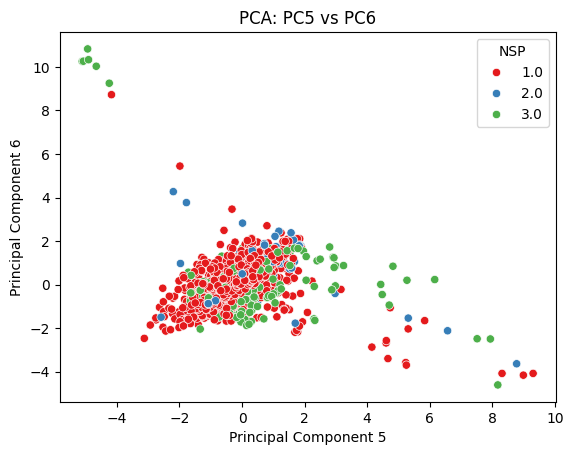

In [29]:
# Cặp: PC5 và PC6
sns.scatterplot(x=pca_df['PC5'], y=pca_df['PC6'], hue=pca_df['NSP'], palette='Set1')
plt.title("PCA: PC5 vs PC6")
plt.xlabel("Principal Component 5")
plt.ylabel("Principal Component 6")
plt.legend(title="NSP")
plt.show()

## **LDA - Linear Discriminant Analysis**

In [30]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)


### **Tham số thống kê của dữ liệu sau khi phân tích thành phần chính**

In [31]:
# Tham số thống kê của dữ liệu sau khi đã PCA
lda_df = pd.DataFrame(X_lda, columns=["LD1", "LD2"])
lda_df.describe()

LD1           LD2
count  2.126000e+03  2.126000e+03
mean   4.545335e-16  2.941099e-16
std    1.643238e+00  1.165169e+00
min   -2.995003e+00 -2.629396e+00
25%   -1.049082e+00 -8.578041e-01
50%   -4.878223e-01  2.764145e-02
75%    5.094328e-01  7.174235e-01
max    8.685769e+00  3.761138e+00

### **Thực hiện hiển thị trực quan đối với dữ liệu theo từng cặp 02 thành phần chính**



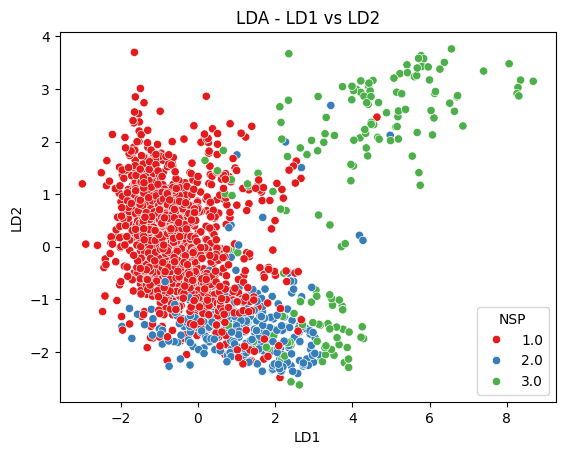

In [45]:
# Thêm nhãn vào DataFrame
lda_df["NSP"] = y

# Trực quan hóa kết quả LDA
sns.scatterplot(x="LD1", y="LD2", hue="NSP", data=lda_df, palette="Set1")
plt.title("LDA - LD1 vs LD2")
plt.show()


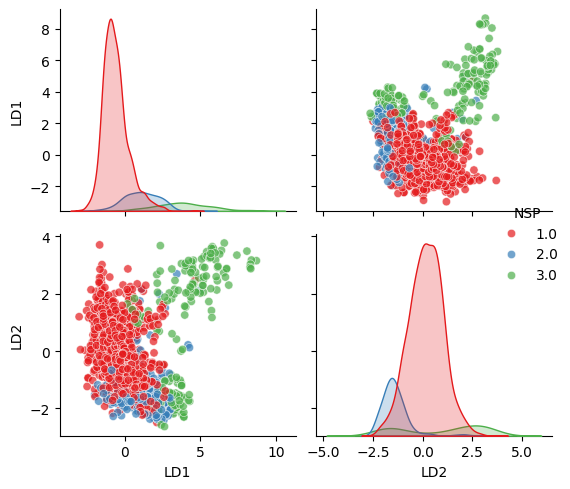

In [33]:
# Vẽ pairplot cho LDA
sns.pairplot(lda_df, hue='NSP', palette='Set1', plot_kws={'alpha': 0.7})

plt.tight_layout()
plt.show()

### **Xác định lượng thông tin được bảo tồn theo phương sai giải thích (explained variances)** 

Dựa vào tỷ số giữa phương sai giữa lớp và trong lớp => tính từ explained_variance_ratio_ của LinearDiscriminantAnalysis

In [37]:
explained_variance_lda = lda.explained_variance_ratio_
print(f"Phương sai giải thích của LDA: {explained_variance_lda}")

Phương sai giải thích của LDA: [0.82591875 0.17408125]


In [40]:
cumulative_explained_variance_lda = explained_variance_lda.cumsum()
print("Phương sai giải thích tích lũy:", cumulative_explained_variance_lda)

Phương sai giải thích tích lũy: [0.82591875 1.        ]


Chỉ với 2 thành phần chính, LDA giữ lại toàn bộ thông tin phân biệt lớp.

Thành phần đầu tiên (LD1) chiếm tới 82.6% thông tin phân biệt giữa các lớp => có thể dùng để trực quan hóa tốt.

LDA phù hợp hơn cho nhiệm vụ phân loại vì nó tối ưu hóa việc phân tách giữa các lớp.

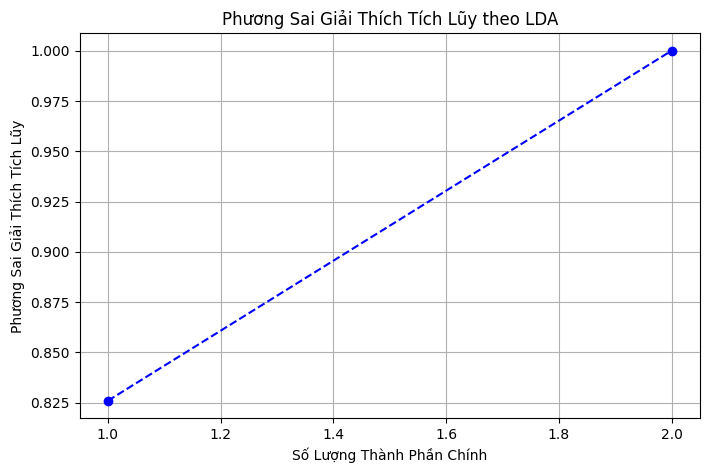

In [43]:
# Trực quan hóa phương sai giải thích của từng thành phần chính
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance_lda) + 1), cumulative_explained_variance_lda, marker='o', linestyle='--', color='b')
plt.title("Phương Sai Giải Thích Tích Lũy theo LDA")
plt.xlabel("Số Lượng Thành Phần Chính")
plt.ylabel("Phương Sai Giải Thích Tích Lũy")
plt.grid(True)
plt.show()

### **Thực hiện trực quan hóa mối quan hệ của một số chiều dữ liệu chính với đầu ra để xem xét khả năng có tương quan hay hình thành cụm dữ liệu**

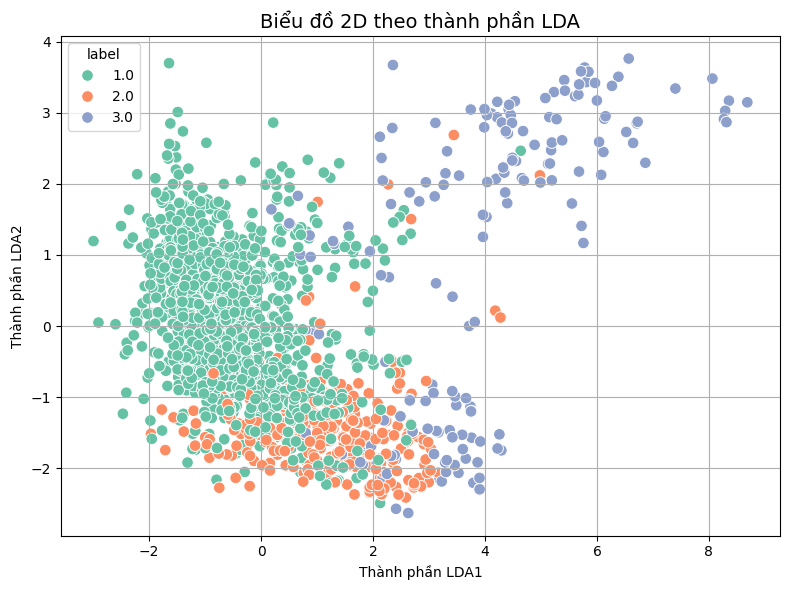

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='NSP', palette='Set2', s=70)
plt.title("Biểu đồ 2D theo thành phần LDA", fontsize=14)
plt.xlabel("Thành phần LDA1")
plt.ylabel("Thành phần LDA2")
plt.grid(True)
plt.legend(title="label")
plt.tight_layout()
plt.show()